# Arbol de decisión
## Lectura de datos

In [1]:
import pandas as pd
from pandas import Series,DataFrame

setInicial=pd.read_csv('Vinos.csv')

#Recuperar nombres de las columnas de los atributos y la clase
atributosName=setInicial.columns[:-1]
atributoClase=setInicial.columns[-1]
print(atributoClase)
print(atributosName)

#Datos de los atributos
dataGral=setInicial[atributosName]

#Datos de la clase (vector de elementos reales)
claseGral=setInicial[atributoClase]

#Instancias por clase
print(claseGral.value_counts())


Clase
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Clase
Calidad_5    681
Calidad_7    199
Name: count, dtype: int64


## Generar un solo modelo
Entrenamiento

|--- alcohol <= 10.53
|   |--- alcohol <= 9.85
|   |   |--- fixed acidity <= 12.45
|   |   |   |--- class: Calidad_5
|   |   |--- fixed acidity >  12.45
|   |   |   |--- class: Calidad_7
|   |--- alcohol >  9.85
|   |   |--- sulphates <= 0.63
|   |   |   |--- class: Calidad_5
|   |   |--- sulphates >  0.63
|   |   |   |--- class: Calidad_5
|--- alcohol >  10.53
|   |--- sulphates <= 0.63
|   |   |--- volatile acidity <= 0.49
|   |   |   |--- class: Calidad_7
|   |   |--- volatile acidity >  0.49
|   |   |   |--- class: Calidad_5
|   |--- sulphates >  0.63
|   |   |--- alcohol <= 11.55
|   |   |   |--- class: Calidad_7
|   |   |--- alcohol >  11.55
|   |   |   |--- class: Calidad_7



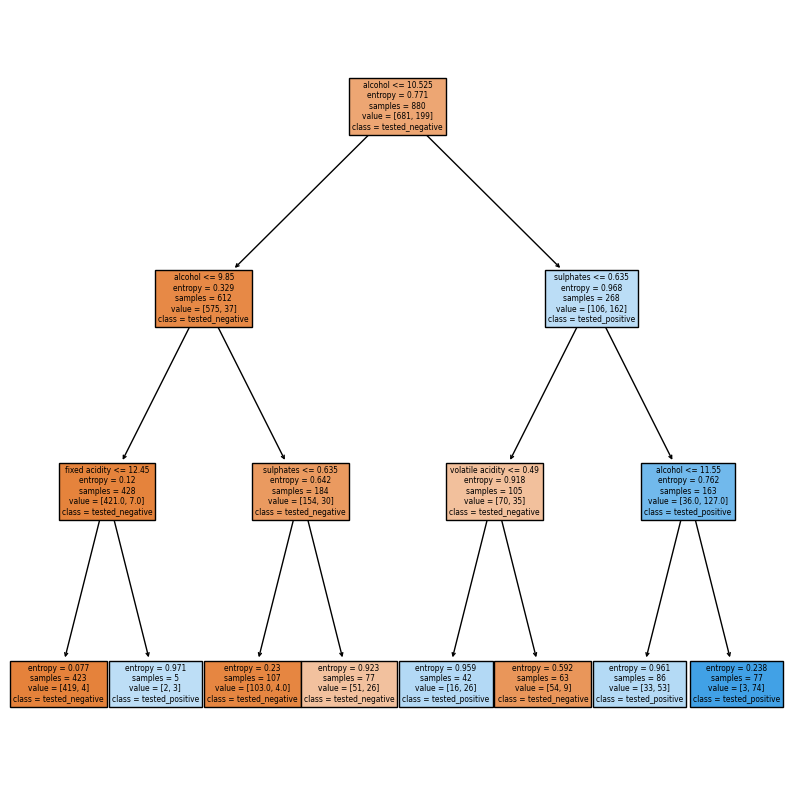

In [2]:
from sklearn.tree import DecisionTreeClassifier

################## Clasificador ######################
clasificador = DecisionTreeClassifier(criterion='entropy', max_depth=3)

################## Modelo ###########################
modelo = clasificador.fit(dataGral, claseGral)

from sklearn.tree import export_text

arbol = export_text(modelo, feature_names=atributosName.to_list())
print(arbol)



import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clasificador,feature_names=atributosName.to_list(),class_names=['tested_negative','tested_positive'],filled=True)#, rounded=True)
plt.show()

Clasificación (predicción)

In [3]:
setPredic=pd.DataFrame({'fixed acidity':[7.4, 7.5, 7.9],
                        'volatile acidity':[0.5, 0.49, 0.6], 
                        'citric acid':[0, 0.11, 0.21], 
                        'residual sugar':[1.9, 1.8, 2.2],
                        'chlorides':[0.17, 0.066, 0.106], 
                        'free sulfur dioxide':[7, 10, 25], 
                        'total sulfur dioxide':[145, 71, 37], 
                        'density':[0.9966, 0.9964, 0.9978],
                        'pH':[3.11, 3.17, 3.28], 
                        'sulphates':[1.28, 0.83, 1.2], 
                        'alcohol':[9.2, 8, 10]})


#Instancias por clase
print(setPredic)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.50         0.00             1.9      0.170   
1            7.5              0.49         0.11             1.8      0.066   
2            7.9              0.60         0.21             2.2      0.106   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    7                   145   0.9966  3.11       1.28   
1                   10                    71   0.9964  3.17       0.83   
2                   25                    37   0.9978  3.28       1.20   

   alcohol  
0      9.2  
1      8.0  
2     10.0  


In [4]:
#Asignar clase
Clases=modelo.predict(setPredic)
print(Clases)

['Calidad_5' 'Calidad_5' 'Calidad_5']


In [5]:
predictExp2=modelo.predict(dataGral)
predictExp2

print(len(claseGral), len(predictExp2))

Aciertos=0
for x in range(len(claseGral)):
    if claseGral[x]==predictExp2[x]:
        Aciertos+=1

print(Aciertos, len(claseGral)-Aciertos)

880 880
783 97


## Separación de conjuntos
Entrenamiento

In [6]:
from sklearn.model_selection import train_test_split

#Separar los datos
valoresTrain, valoresTest, clasesTrain, clasesTest= \
train_test_split(dataGral, claseGral, test_size=0.20)

print(len(valoresTrain), len(valoresTest))

valoresTrain.head()


704 176


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
508,6.7,0.64,0.23,2.10,0.080,11.0,119.0,0.99538,3.36,0.70,10.9
375,9.0,0.58,0.25,2.80,0.075,9.0,104.0,0.99779,3.23,0.57,9.7
509,6.6,0.80,0.03,7.80,0.079,6.0,12.0,0.99630,3.52,0.50,12.2
627,6.7,0.70,0.08,3.75,0.067,8.0,16.0,0.99334,3.43,0.52,12.6
755,8.4,0.25,0.39,2.00,0.041,4.0,10.0,0.99386,3.27,0.71,12.5


Clasificación (evaluación)

In [7]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

################## Clasificador ######################
clasificador = DecisionTreeClassifier(criterion='entropy')

################## Modelo ###########################
modelo = clasificador.fit(valoresTrain, clasesTrain)

predict = modelo.predict(valoresTest)
predictTrain=modelo.predict(valoresTrain)

print("Conjunto de evaluación: ",accuracy_score(clasesTest,predict))
print("Conjunto de entrenamiento: ",accuracy_score(clasesTrain,predictTrain))


Conjunto de evaluación:  0.8920454545454546
Conjunto de entrenamiento:  1.0


## Overfitting y underfitting

[0.875, 0.8579545454545454, 0.8863636363636364, 0.9147727272727273, 0.9204545454545454, 0.9261363636363636, 0.9261363636363636, 0.9204545454545454, 0.9318181818181818, 0.9261363636363636, 0.9318181818181818, 0.9318181818181818, 0.9318181818181818, 0.9318181818181818, 0.9375, 0.9375, 0.9204545454545454, 0.9375, 0.9147727272727273, 0.9375, 0.9318181818181818, 0.9318181818181818, 0.9375, 0.9318181818181818, 0.9261363636363636, 0.9147727272727273, 0.9204545454545454, 0.9375, 0.9147727272727273]
[0.8735795454545454, 0.8849431818181818, 0.9161931818181818, 0.9375, 0.96875, 0.9801136363636364, 0.9957386363636364, 0.9985795454545454, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


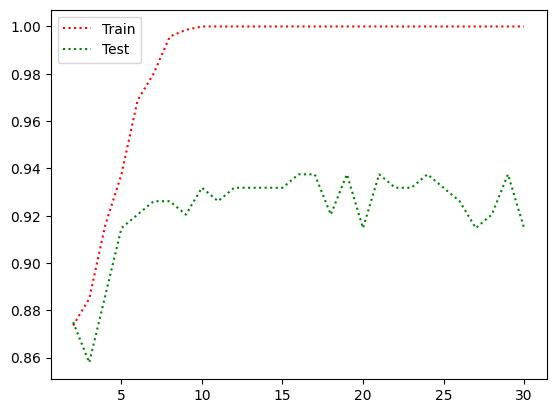

In [9]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

prof=[5,10,15,20,25]

Train=[]
Test=[]

################## Clasificador ######################

################## Modelo ###########################
for x in prof:
    clasificador = DecisionTreeClassifier(criterion='entropy', max_depth=x)    
    modelo = clasificador.fit(valoresTrain, clasesTrain)
    predict = modelo.predict(valoresTest)
    predictTrain=modelo.predict(valoresTrain)
    
    Test.append(accuracy_score(clasesTest,predict))
    Train.append(accuracy_score(clasesTrain,predictTrain))

print(Test)
print(Train)

plt.plot(prof, Train, label='Train', color='red', linestyle='dotted')
plt.plot(prof,Test, label='Test', color='green', linestyle='dotted')
plt.legend()


In [ ]:
%%shell
jupyter nbconvert --to html 2_1_Arbol.ipynb

[NbConvertApp] Converting notebook 2_1_Arbol.ipynb to html
[NbConvertApp] Writing 913065 bytes to 2_1_Arbol.html
